In [136]:
# The values for K are is derived from the formula:  abs(sin(i+ 1))×(2**32)
K = [
0xd76aa478, 0xe8c7b756, 0x242070db, 0xc1bdceee,
0xf57c0faf, 0x4787c62a, 0xa8304613, 0xfd469501,
0x698098d8, 0x8b44f7af, 0xffff5bb1, 0x895cd7be,
0x6b901122, 0xfd987193, 0xa679438e, 0x49b40821,
0xf61e2562, 0xc040b340, 0x265e5a51, 0xe9b6c7aa,
0xd62f105d, 0x02441453, 0xd8a1e681, 0xe7d3fbc8,
0x21e1cde6, 0xc33707d6, 0xf4d50d87, 0x455a14ed,
0xa9e3e905, 0xfcefa3f8, 0x676f02d9, 0x8d2a4c8a,
0xfffa3942, 0x8771f681, 0x6d9d6122, 0xfde5380c,
0xa4beea44, 0x4bdecfa9, 0xf6bb4b60, 0xbebfbc70,
0x289b7ec6, 0xeaa127fa, 0xd4ef3085, 0x04881d05,
0xd9d4d039, 0xe6db99e5, 0x1fa27cf8, 0xc4ac5665,
0xf4292244, 0x432aff97, 0xab9423a7, 0xfc93a039,
0x655b59c3, 0x8f0ccc92, 0xffeff47d, 0x85845dd1,
0x6fa87e4f, 0xfe2ce6e0, 0xa3014314, 0x4e0811a1,
0xf7537e82, 0xbd3af235, 0x2ad7d2bb, 0xeb86d391
]

In [137]:
# number of shifts
shift = [
    7, 12, 17, 22,
    7, 12, 17, 22,
    7, 12, 17, 22,
    7, 12, 17, 22,
    5, 9, 14, 20,
    5, 9, 14, 20,
    5, 9, 14, 20,
    5, 9, 14, 20,
    4, 11, 16, 23,
    4, 11, 16, 23,
    4, 11, 16, 23,
    4, 11, 16, 23,
    6, 10, 15, 21,
    6, 10, 15, 21,
    6, 10, 15, 21,
    6, 10, 15, 21
]

The MD5  F, G, H and I functions

In [138]:
def F(B, C, D):
    return (B & C) | ((~B) & D)


In [139]:
def G(B,C,D):
    return (B & D)| (C & (~D))

In [140]:
def H(B, C, D):
    return B ^ C ^ D

In [141]:
def I(B, C, D):
    return C ^ (B | (~D))

Modular addition

In [142]:
def mod_add(X,Y):
    Z=0x100000000
    return (X+Y)%Z

Left rotate

In [143]:
def left_rotate(x, amount):
    x &= 0xFFFFFFFF
    return ((x<<amount) | (x>>(32-amount))) & 0xFFFFFFFF

Round 
###### m_index=[
######  [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
######    [1,6,11,0,5,10,15,4,9,14,3,8,13,2,7,12],
######    [5,8,11,14,1,4,7,10,13,0,3,6,9,12,15,2],
######    [0,7,14,5,12,3,10,1,8,15,6,13,4,11,2,9]
###### ]
    

In [144]:
def round(A, B, C, D,M, round_num):
    for i in range(16):
        if round_num == 1:
            fun_val = F(B, C, D)
            m_index = i
        elif round_num == 2:
            fun_val = G(B, C, D)
            m_index = (5*i + 1) % 16
        elif round_num == 3:
            fun_val = H(B, C, D)
            m_index = (3*i + 2) % 16
        else: 
            fun_val = I(B, C, D)
            m_index = (7*i) % 16

        fun_val = mod_add(fun_val, A)
        fun_val = mod_add(fun_val, K[i + 16*(round_num-1)])
        fun_val = mod_add(fun_val, int.from_bytes(M[m_index*4:(m_index+1)*4], byteorder='little'))  #???

        new_B = mod_add(B , left_rotate(fun_val, shift[i + 16*(round_num-1)])) 
        A, B, C, D = D, new_B, B, C

    return A, B, C, D

implement MD5 algorithm

In [145]:
def MD5(message):
    # Convert the string to binary
    bin_string = ''.join(format(ord(c), '08b') for c in message)
    
    # Add padding
    bin_string += '1'
    len_bits = len(bin_string)
    padding_needed = (448 - len_bits) % 512
    bin_string += '0' * padding_needed
    
    # Add length
    original_length = format(len(message) * 8, '064b')
    bin_string += original_length

    padded_message = bin_string

    # Convert the binary string to bytes
    message_bytes = int(padded_message, 2).to_bytes(len(padded_message) // 8, byteorder='little')

    # initialization vectors 
    A =0x01234567
    B =0x89abcdef
    C =0xfedcba98
    D =0x76543210
  

    # Process each 512-bit chunk
    for i in range(0, len(message_bytes), 64):
        M = message_bytes[i:i+64]
        A_temp, B_temp, C_temp, D_temp = A, B, C, D
        for round_num in range(1, 5):
            A_temp, B_temp, C_temp, D_temp = round(A_temp, B_temp, C_temp, D_temp, M, round_num)
            A = mod_add(A,A_temp)
            B = mod_add(B,B_temp)
            C = mod_add(C,C_temp)
            D = mod_add(D,D_temp)
           
    
    return (A.to_bytes(4, byteorder='little') +
            B.to_bytes(4, byteorder='little') +
            C.to_bytes(4, byteorder='little') +
            D.to_bytes(4, byteorder='little')).hex()


Round1 

In [146]:
print(MD5('Hello world'))
    

a8d05dc0de4f81236fbd2bed92529353


implement family tree

In [147]:
from collections import deque
class Node:
    def __init__(self, name, parent=None):
        self.name = name
        self.parent = parent
        self.children = set()
        self.siblings = set()
        self.connections = set()

class FamilyTree:
    def __init__(self):
        self.nodes = {}                
       

    def add_node(self, child_name, parent_name=None):
        if parent_name is not None and parent_name not in self.nodes:
            self.nodes[parent_name] = Node(parent_name)
          
        if child_name not in self.nodes:
            self.nodes[child_name] = Node(child_name, parent_name)
          

        if parent_name is not None:
            parent_node = self.nodes[parent_name]
            child_node = self.nodes[child_name]
            parent_node.children.add(child_node)
            child_node.parent = parent_node
            parent_node.connections.add(child_node)
            child_node.connections.add(parent_node)

            for sibling in parent_node.children:
                if sibling != child_node:
                    child_node.siblings.add(sibling)
                    sibling.siblings.add(child_node)


    def find(self, name):
        return name in self.nodes
    
    def remove_node(self, node_name):
        if node_name not in self.nodes:
            raise ValueError(f"Node {node_name} does not exist in the graph.")
            
        node = self.nodes[node_name]
        
        if node.parent is not None:
            node.parent.children.remove(node)
        
        for sibling in node.siblings:
            sibling.siblings.remove(node)
        
        for child in node.children:
            child.parent = node.parent
            if node.parent is not None:
                node.parent.children.add(child)
        
        del self.nodes[node_name]


    # def is_ancestor(self, ancestor, descendant):
    #     if self.find(ancestor) and self.find(descendant):
    #         while descendant is not None:
    #             if descendant in self.nodes[ancestor].children:
    #                 return True
    #             descendant = self.nodes[descendant].parent
    #         return False
    #     else:
    #         raise ValueError("One or both nodes do not exist.")
    def is_ancestor(self, ancestor_name, descendant_name):
        if self.find(ancestor_name) and self.find(descendant_name):
            while descendant_name is not None:
                if descendant_name in [child.name for child in self.nodes[ancestor_name].children]:
                    return True
                descendant_name = self.nodes[descendant_name].parent.name if self.nodes[descendant_name].parent else None
            return False
        else:
            raise ValueError("One or both nodes do not exist.")



    def common_Parent(self, name1, name2):
        if self.find(name1) and self.find(name2):
            ancestors1 = set()
            current_name = name1
            while current_name is not None:
                ancestors1.add(current_name)
                current_name = self.nodes[current_name].parent.name if self.nodes[current_name].parent else None

            current_name = name2
            while current_name is not None:
                if current_name in ancestors1:
                    return current_name,MD5(current_name)
                current_name = self.nodes[current_name].parent.name if self.nodes[current_name].parent else None
        else:
            raise ValueError("One or both nodes do not exist.")


    def has_relation(self,name1,name2):
        if self.find(name1) and self.find(name2):
            if self.common_Parent(name1,name2) and not (self.is_ancestor(name1,name2) and self.is_ancestor(name2,name1)):
                return True 
            return False
        else:
            raise ValueError("One or both nodes do not exist.")

    def furthest_child(self, name):
        if name in self.nodes:
            node = self.nodes[name]

            if node.children:
                max_depth, furthest_child = max((self.furthest_child(child.name) for child in node.children), key=lambda x: x[0])
                return 1 + max_depth, furthest_child
            else:
                return 0, node
        else:
            raise ValueError("One or both nodes do not exist.")

    def __find_root(self):
        for name, node in self.nodes.items():
            if node.parent is None:
                return name
        return None
     

    def __bfs(self, start):
        visited = {name: False for name in self.nodes}
        distance = {name: 0 for name in self.nodes}
        queue = deque([start])
        visited[start] = True

        while queue:
            node = queue.popleft()
            for neighbour in self.nodes[node].connections:
                if neighbour.name in visited and not visited[neighbour.name]:
                    queue.append(neighbour.name)
                    visited[neighbour.name] = True
                    distance[neighbour.name] = distance[node] + 1

        max_distance_node = max(distance, key=distance.get)
        return max_distance_node, distance[max_distance_node]


    def find_diameter(self):
        root = self.__find_root()
        # First BFS to find one end point of the longest path
        node, _ = self.__bfs(root)

        # Second BFS to find the actual longest path
        second_node, diameter = self.__bfs(node)

        return node,second_node,diameter




family members

In [148]:
tree=FamilyTree()
tree.add_node('Fatemeh(Ali)','Mohammad(Zahra)')
tree.add_node('Hossein(Motahareh)','Fatemeh(Ali)')
tree.add_node('Yazdan','Hossein(Motahareh)')
tree.add_node('Reza(Aliyeh)','Mohammad(Zahra)')
tree.add_node('Mehrzad(Razieh)','Mohammad(Zahra)')
tree.add_node('Mohammad','Mehrzad(Razieh)')
tree.add_node('Yalda(Mojtaba)','Fatemeh(Ali)')
tree.add_node('sana', 'Reza(Aliyeh)')



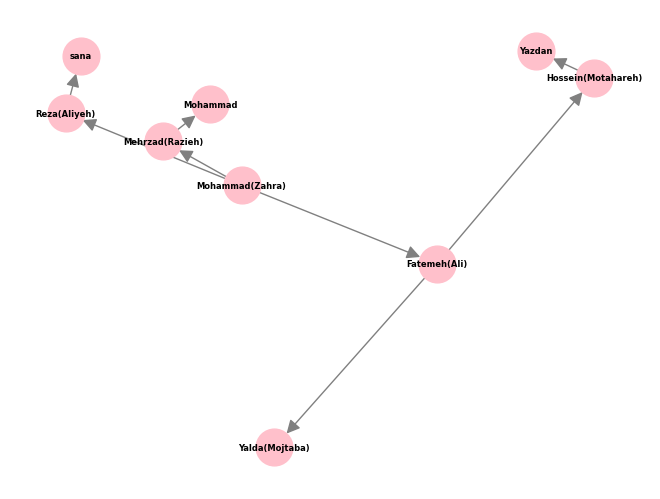

In [149]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_tree():
 
    graph_data = {}
    
    for name, node in tree.nodes.items():
        childs = []
        for child in node.children:
            childs.append(child.name)
        
        graph_data[name] = childs
        
    G = nx.from_dict_of_lists(graph_data, create_using=nx.DiGraph)

    pos = nx.spring_layout(G)  
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='pink', font_size=6, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, arrowsize=20)

    plt.show()

draw_tree()  


In [150]:
print(tree.find('sana'))
print(tree.find('Mehrzad(Razieh)'))

True
True


In [151]:
tree.remove_node('sana')
print(tree.find('sana'))

False


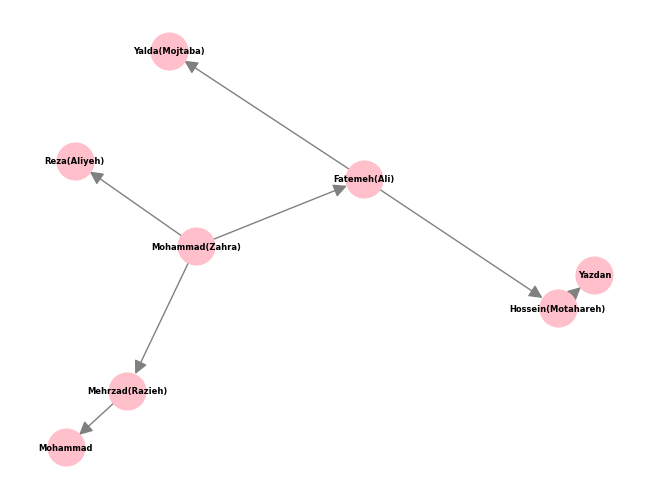

In [152]:
draw_tree()

In [153]:
tree.remove_node('Mehrzad(Razieh)')
print(tree.find('Mehrzad(Razieh)'))

False


In [154]:
print(tree.find('Mehrzad(Razieh)'))

False


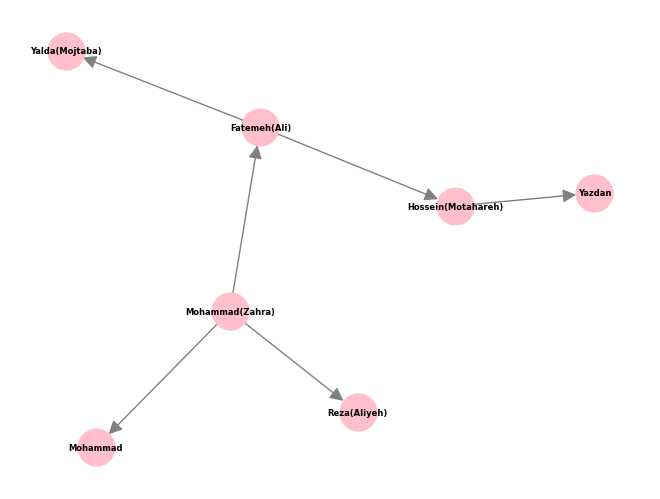

In [155]:
draw_tree()

In [156]:
dist,node=tree.furthest_child('Mohammad(Zahra)')
print(f'distance: {dist}')
print(f'furthest child: {node.name,(MD5(node.name))}')



distance: 3
furthest child: ('Yazdan', '35584686def1e36569939c21b3b82ef7')


In [157]:
first,second,dist=tree.find_diameter()

print(f'the furthest relation is between {(first ,(MD5(first)))} and {(second,(MD5(second)))}  distance={dist}')


the furthest relation is between ('Yazdan', '35584686def1e36569939c21b3b82ef7') and ('Reza(Aliyeh)', '99a63a85e528e7c1322e404042bab7ee')  distance=4


In [158]:
tree.common_Parent('Hossein(Motahareh)','Yalda(Mojtaba)')

('Fatemeh(Ali)', 'bf2550df4c75c28c6e86fc7be6d2e70a')

In [159]:
tree.is_ancestor('Yazdan','Hossein(Motahareh)')

False

In [160]:
tree.is_ancestor('Hossein(Motahareh)','Yazdan')

True

In [163]:
tree.has_relation('Mohammad','Yazdan')

True

In [162]:
tree.has_relation('tina','Yazdan')

ValueError: One or both nodes do not exist.